In [1]:
import numpy as np
# Define Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Define Derivative of Sigmoid Function
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

np.random.seed(1)

X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 1]

lr = 0.5

size = [2, 3, 3, 3, 1]

weights = []
for i in range(len(size)-1):
    weights += [np.squeeze(np.random.uniform(low=0, high=1, size=(size[i], size[i+1])))]

biases = []
for i in range(1, len(size)):
    biases += [np.squeeze(np.ones((1, size[i])))]

# Store Deltas
all_delta_w = np.array(weights)*0
all_delta_b = np.array(biases)*0

for i in range(100000):
    # Forward Pass
    for x, y in zip(X, Y):
        C = 0
        z = 0
        a = [x]
        z_inp = np.array(x)
        z = []
        for w, b in zip(weights, biases):
            z += [np.dot(z_inp, w) + b]
            a += [sigmoid(z[-1])]
            z_inp = a[-1]

        # Update the Cost function
        C += 0.5*(y - a[-1])**2

        #backprop
        # layer l-1 (final layer)
        delta = (a[-1] - y) * sigmoid_der(z[-1])
        all_delta_w[-1] += np.dot(delta, np.transpose(a[-2]))
        all_delta_b[-1] += delta

        delta_prev = delta
        for l in range(2,len(size)):
            delta = np.dot(weights[-l+1], delta_prev) * sigmoid_der(z[-l])
            all_delta_w[-l] += np.squeeze(np.transpose(np.outer(delta, np.transpose(a[-l-1]))))
            all_delta_b[-l] += delta

            delta_prev = delta

    if np.mod(i, 1000) == 0:
        print('Epoch: %d - %f\r' % (i, C/4), end='')

    # Update Weights and Biases
    weights = weights - lr/4 * all_delta_w
    biases = biases - lr/4 * all_delta_b

    all_delta_w *= 0
    all_delta_b *= 0

C:\Users\David\AppData\Local\Temp\ipykernel_14540\3925721208.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_delta_w = np.array(weights)*0
C:\Users\David\AppData\Local\Temp\ipykernel_14540\3925721208.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_delta_b = np.array(biases)*0
C:\Users\David\AppData\Local\Temp\ipykernel_14540\3925721208.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mean

In [2]:
x = [1, 0]

a = [x]
z_inp = np.array(x)
z = []
for w, b in zip(weights, biases):
    z += [np.dot(z_inp, w) + b]
    a += [sigmoid(z[-1])]
    z_inp = a[-1]

print(a[-1])

0.9952228580243536


# Trying out on the MNIST dataset

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(np.shape(X_train))

X_train_R = np.reshape(X_train, (60000, 28*28))
X_test_R = np.reshape(X_test, (len(X_test), 28*28))

print(np.amax(X_train_R[0]))
print(np.shape(X_train_R))
print(np.shape(Y_train))

n_classes = 10

targets = np.array(Y_train).reshape(-1)
Y_train_E = np.eye(n_classes)[targets]

(60000, 28, 28)
255
(60000, 784)
(60000,)


In [5]:
lr = 0.5

X = X_train_R/255
Y = Y_train_E

size = [784, 100, 50, 10]

weights = []
for i in range(len(size)-1):
    weights += [np.squeeze(np.random.uniform(low=0, high=0.01, size=(size[i], size[i+1])))]

biases = []
for i in range(1, len(size)):
    biases += [np.squeeze(np.ones((1, size[i])))]

# Store Deltas
all_delta_w = np.array(weights)*0
all_delta_b = np.array(biases)*0

for i in range(50000):
    # Forward Pass
    idx = np.random.choice(np.arange(len(X)), size=20, replace=False)
    X_subset = X[idx]
    Y_subset = Y[idx]
    for x, y in zip(X_subset, Y_subset):
        C = 0
        z = 0
        a = [x]
        z_inp = np.array(x)
        z = []
        for w, b in zip(weights, biases):
            z += [np.dot(z_inp, w) + b]
            a += [sigmoid(z[-1])]
            z_inp = a[-1]

        # Update the Cost function
        C += 0.5*np.sum((y - a[-1])**2)

        #backprop
        # layer l-1 (final layer)
        delta = (a[-1] - y) * sigmoid_der(z[-1])
        all_delta_w[-1] += np.squeeze(np.transpose(np.outer(delta, np.transpose(a[-2]))))
        all_delta_b[-1] += delta

        delta_prev = delta
        for l in range(2,len(size)):
            delta = np.dot(weights[-l+1], delta_prev) * sigmoid_der(z[-l])
            all_delta_w[-l] += np.squeeze(np.transpose(np.outer(delta, np.transpose(a[-l-1]))))
            all_delta_b[-l] += delta

            delta_prev = delta

    if np.mod(i, 1000) == 0:
        print('Epoch: %d - %f\r' % (i, C/20), end='')

    # Update Weights and Biases
    weights = weights - lr/4 * all_delta_w
    biases = biases - lr/4 * all_delta_b

    all_delta_w *= 0
    all_delta_b *= 0

Epoch: 0 - 0.134483Epoch: 1000 - 0.021168Epoch: 2000 - 0.022028Epoch: 3000 - 0.002114Epoch: 4000 - 0.019545Epoch: 5000 - 0.001578Epoch: 6000 - 0.000246Epoch: 7000 - 0.000062Epoch: 8000 - 0.000033Epoch: 9000 - 0.000116Epoch: 10000 - 0.000006Epoch: 11000 - 0.000006Epoch: 12000 - 0.000013Epoch: 13000 - 0.000008Epoch: 14000 - 0.000007Epoch: 15000 - 0.000013Epoch: 16000 - 0.000021Epoch: 17000 - 0.000006Epoch: 18000 - 0.000012Epoch: 19000 - 0.000003Epoch: 20000 - 0.003351Epoch: 21000 - 0.000003Epoch: 22000 - 0.000042Epoch: 23000 - 0.000023Epoch: 24000 - 0.000972Epoch: 25000 - 0.000039Epoch: 26000 - 0.000013Epoch: 27000 - 0.000000Epoch: 28000 - 0.000065Epoch: 29000 - 0.000003Epoch: 30000 - 0.000005Epoch: 31000 - 0.000002Epoch: 32000 - 0.000001Epoch: 33000 - 0.000001Epoch: 34000 - 0.000000Epoch: 35000 - 0.002264Epoch: 36000 - 0.000000Epoch: 37000 - 0.000001Epoch: 38000 - 0.000001Epoch: 39000 - 0.000000Epoch: 40000 - 0.000000Epoch: 41000 - 0.000000Epoch: 42000 - 0.000000Epoch: 43000 - 0.000000E

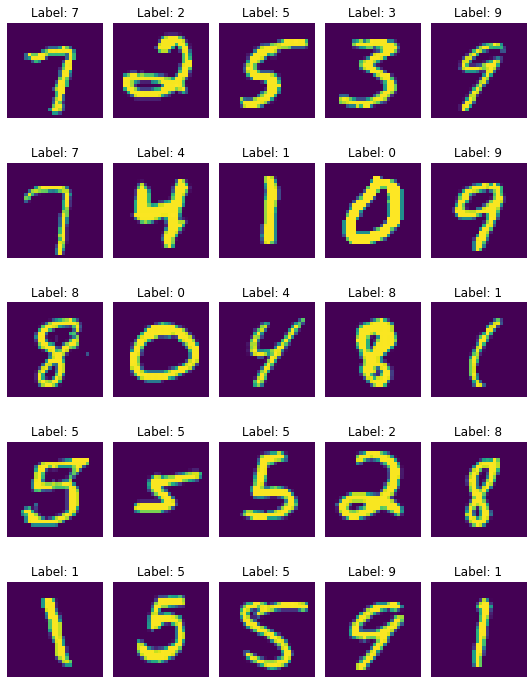

In [6]:
import matplotlib.pyplot as plt

def get_prediction(x):
    a = [x]
    z_inp = np.array(x)
    z = []
    for w, b in zip(weights, biases):
        z += [np.dot(z_inp, w) + b]
        a += [sigmoid(z[-1])]
        z_inp = a[-1]

    y = np.argmax(a[-1])

    return y

i = 200

num_row = 5
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(25):
    idx = np.random.choice(len(X_test), size=1)
    img = np.squeeze(X_test[idx])
    img_R = np.reshape(img, 28*28)
    ax = axes[i//num_col, i%num_col]
    ax.axis('off')
    ax.imshow(img)
    ax.set_title('Label: %d' % (get_prediction(img_R)))
plt.tight_layout()
plt.show()



In [7]:
y_pred = []

for x in X_test_R:
    x = x/255
    a = [x]
    z_inp = np.array(x)
    z = []
    for w, b in zip(weights, biases):
        z += [np.dot(z_inp, w) + b]
        a += [sigmoid(z[-1])]
        z_inp = a[-1]

    y_pred += [np.argmax(a[-1])]

In [8]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test, np.array(y_pred))

print(score)



0.9722


In [9]:
accuracy_score(Y_test, np.array(y_pred))

0.9722

(784, 100)


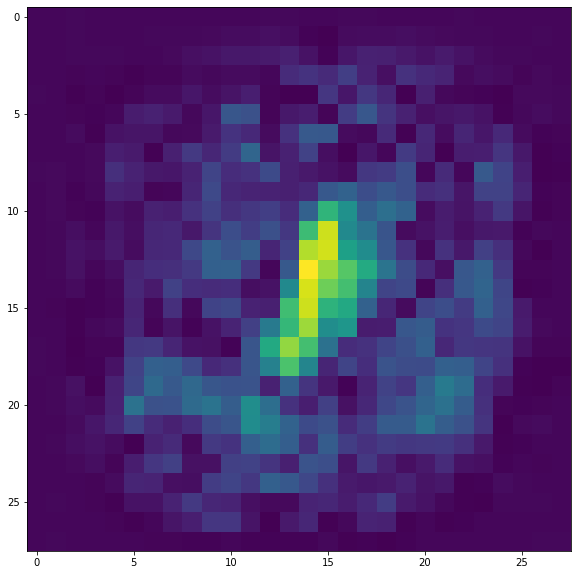

In [23]:
print(np.shape(weights[0]))

plt.figure(figsize=(10, 10))
plt.imshow(np.abs(np.reshape(np.mean(weights[0], axis=1), (28, 28))))
plt.show()